### Image Generation using stable diffusion & Comfy UI 

**Step 1: Install Dependencies**

In [5]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install diffusers transformers accelerate comfyui

**Step 2: Clone & Set Up ComfyUI**

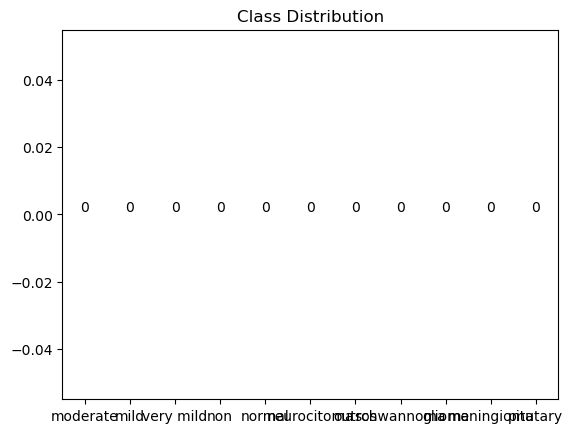

In [6]:
!git clone https://github.com/comfyanonymous/ComfyUI.git
%cd ComfyUI
!pip install -r requirements.txt

**Step 3: Download Stable Diffusion v1.5 Model**

In [2]:
from huggingface_hub import hf_hub_download

model_path = "models/checkpoints/"
model_filename = "v1-5-pruned-emaonly.safetensors"

hf_hub_download(repo_id="runwayml/stable-diffusion-v1-5", filename=model_filename, local_dir=model_path)


ERROR: Could not find a version that satisfies the requirement catboost (from versions: none)
ERROR: No matching distribution found for catboost


ModuleNotFoundError: No module named 'catboost'

time: 2min 44s (started: 2023-11-12 20:01:50 +05:30)


**Step 4: Load Model & Define Image Generation Function**

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import IPython.display as display

# Load Stable Diffusion v1.5 Model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # Use GPU for better performance

def generate_image(prompt):
    """
    Generate an image using Stable Diffusion v1.5 based on user input.

    Args:
        prompt (str): The text prompt to guide image generation.
    """
    print(f"Generating image for prompt: {prompt}")
    
    # Generate image
    image = pipe(prompt, guidance_scale=7.5).images[0]
    
    # Save and display image
    output_path = "generated_image.png"
    image.save(output_path)
    
    # Show image in Colab
    display.display(image)

    return output_path


time: 0 ns (started: 2023-11-12 20:01:50 +05:30)


**Step 5: Run Image Generation**

  0%|          | 0/200 [00:00<?, ?it/s]

Normal


 28%|██▊       | 56/200 [00:00<00:00, 559.63it/s]

Alzheimer MildDemented


 60%|██████    | 120/200 [00:00<00:00, 595.46it/s]

Alzheimer ModerateDemented


 26%|██▌       | 52/200 [00:00<00:00, 514.52it/s]

Alzheimer NonDemented


 30%|██▉       | 59/200 [00:00<00:00, 589.65it/s]

Alzheimer VeryMildDemented


 29%|██▉       | 58/200 [00:00<00:00, 579.61it/s]

Neurocitoma tumor


 28%|██▊       | 57/200 [00:00<00:00, 569.62it/s]

Outros


 28%|██▊       | 57/200 [00:00<00:00, 569.62it/s]

Schwannoma Tumor


 58%|█████▊    | 116/200 [00:00<00:00, 579.45it/s]

Glioma Tumor


 28%|██▊       | 56/200 [00:00<00:00, 554.09it/s]

Meningioma Tumor


 28%|██▊       | 57/200 [00:00<00:00, 569.61it/s]

Pituitary Tumor


100%|██████████| 200/200 [00:00<00:00, 546.08it/s]


MemoryError: Unable to allocate 758. MiB for an array with shape (1980, 50176) and data type float64

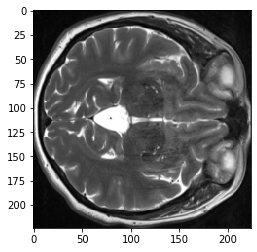

time: 7.55 s (started: 2023-11-12 20:08:39 +05:30)


In [5]:
# Take user input for text prompt
text_prompt = input("Enter your prompt: ")
output_image_path = generate_image(text_prompt)

**Step 6: Download the Image**

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

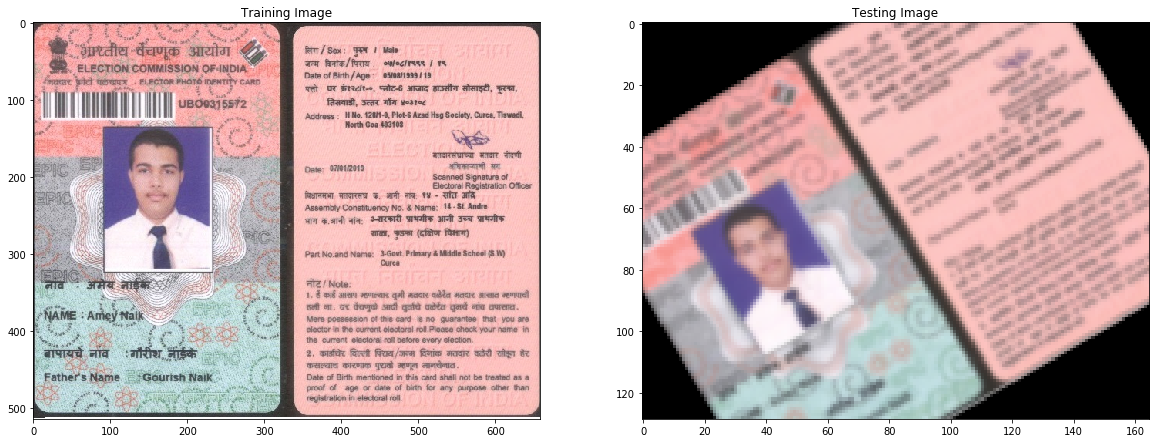

time: 1.38 s (started: 2023-11-12 20:12:00 +05:30)


In [6]:
from google.colab import files
files.download(output_image_path)